In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data1.csv")
data.head()

,x,y
0,17,94
1,13,73
2,12,59
3,15,80
4,16,93


In [3]:
X = data['x'].values
y = data['y'].values

In [4]:
pd.unique(X)

array([17, 13, 12, 15, 16, 14, 18, 19])

In [5]:
pd.unique(y)

array([94, 73, 59, 80, 93, 85, 66, 79, 77, 91])

#### Remarks: It is not possible to have different output values for same input values. Data is incorrect

## Train data visualisation

Text(0, 0.5, '$y$')

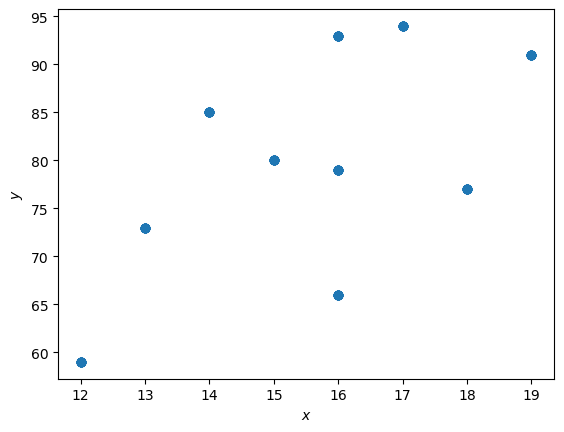

In [6]:
plt.scatter(X,y)
plt.xlabel("$x$")
plt.ylabel("$y$")

In [7]:
class Model:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.w = 0
        self.intercept = 0
    def forward(self):
        return self.X * self.w + self.intercept
    def update(self):
        n = len(X)
        self.w = (n * (self.X * self.y).sum() - self.X.sum() * self.y.sum()) / (n * (self.X**2).sum() - ((self.X).sum())**2) 
        self.intercept = (self.y.sum() - self.w * self.X.sum())/n
        
def rmse(pred, y):
    return np.sqrt(((pred - y)**2).sum()/len(y))
def mae(pred, y):
    return (abs(pred - y)).sum()/len(y)

In [8]:
model = Model(X,y)

In [9]:
model.forward()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
model.update()

In [11]:
model.forward()

array([84.1509434 , 71.43396226, 68.25471698, 77.79245283, 80.97169811,
       74.61320755, 80.97169811, 80.97169811, 87.33018868, 90.50943396,
       84.1509434 , 71.43396226, 68.25471698, 77.79245283, 80.97169811,
       74.61320755, 80.97169811, 80.97169811, 87.33018868, 90.50943396,
       84.1509434 , 71.43396226, 68.25471698, 77.79245283, 80.97169811,
       74.61320755, 80.97169811, 80.97169811, 87.33018868, 90.50943396,
       84.1509434 , 71.43396226, 68.25471698, 77.79245283, 80.97169811,
       74.61320755, 80.97169811, 80.97169811, 87.33018868, 90.50943396,
       84.1509434 , 71.43396226, 68.25471698, 77.79245283, 80.97169811,
       74.61320755, 80.97169811, 80.97169811, 87.33018868, 90.50943396,
       84.1509434 , 71.43396226, 68.25471698, 77.79245283, 80.97169811,
       74.61320755, 80.97169811, 80.97169811, 87.33018868, 90.50943396,
       84.1509434 , 71.43396226, 68.25471698, 77.79245283, 80.97169811,
       74.61320755, 80.97169811, 80.97169811, 87.33018868, 90.50

In [12]:
model.intercept, model.w

(30.10377358490566, 3.1792452830188678)

## MSE on test data

In [13]:
rmse(model.forward(), y)

8.817810022046611

## MAE on test data

In [14]:
mae(model.forward(),y)

7.30566037735849

## Visualisation for test data

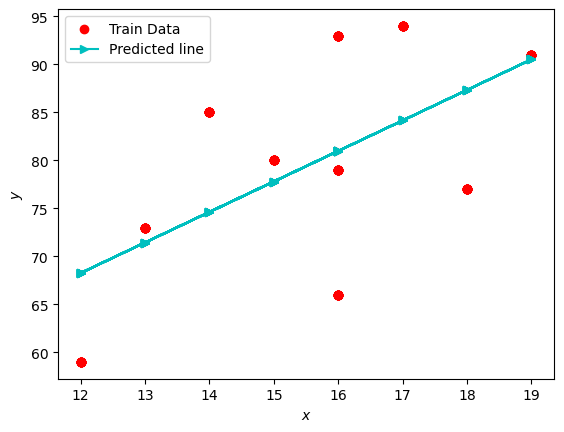

In [15]:
plt.scatter(X,y, color="r")
plt.plot(X, model.forward(), '>-c')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(["Train Data", "Predicted line"])